In [1]:
# !pip install svgling

In [3]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

CPU times: user 1.92 s, sys: 851 ms, total: 2.77 s
Wall time: 2.1 s


In [2]:
%%time
df = pd.read_csv("Womens_Clothing.csv")
df.head()
df.shape

CPU times: user 92.9 ms, sys: 12.3 ms, total: 105 ms
Wall time: 112 ms


(23486, 11)

In [3]:
%%time
df.drop(['Unnamed: 0', 'Clothing ID', 'Title' ], axis=1, inplace=True)

CPU times: user 1.71 ms, sys: 852 µs, total: 2.56 ms
Wall time: 3.95 ms


In [4]:
%%time
df.isnull().sum()/len(df)*100

CPU times: user 20.7 ms, sys: 1.46 ms, total: 22.1 ms
Wall time: 22 ms


Age                        0.000000
Review Text                3.597888
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.059610
Department Name            0.059610
Class Name                 0.059610
dtype: float64

In [5]:
%%time
df.loc[df['Recommended IND'] == 1, "Review Text"] = df.loc[df['Recommended IND'] == 1, "Review Text"].fillna("1")

df.loc[df['Recommended IND'] == 0, "Review Text"] = df.loc[df['Recommended IND'] == 0, "Review Text"].fillna("0")

CPU times: user 14.6 ms, sys: 2.61 ms, total: 17.2 ms
Wall time: 14.8 ms


In [6]:
%%time
df.dropna(subset=['Division Name'], inplace=True)


CPU times: user 13.7 ms, sys: 2.96 ms, total: 16.6 ms
Wall time: 14.4 ms


In [7]:
%%time
df.isnull().sum()

CPU times: user 21.7 ms, sys: 760 µs, total: 22.5 ms
Wall time: 22.2 ms


Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [8]:
%%time
df.head()

CPU times: user 123 µs, sys: 17 µs, total: 140 µs
Wall time: 132 µs


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


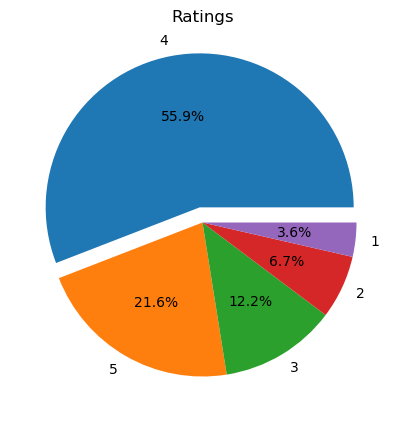

CPU times: user 98.2 ms, sys: 7.81 ms, total: 106 ms
Wall time: 75.5 ms


In [9]:
%%time
## Univariate Analysis.
plt.figure(figsize=(5,5))
plt.pie(df.Rating.value_counts(), autopct="%1.1f%%",
        labels=df.Rating.unique(),
        explode=(0.1,0,0,0,0))
plt.title('Ratings')
plt.show()

In [10]:
# plt.pie(df["Rating"], autopct="%1.1f%%")

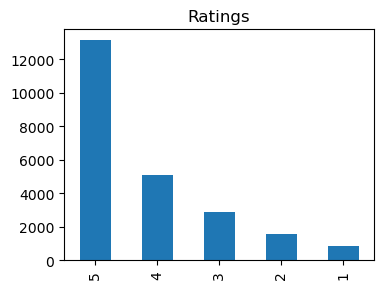

CPU times: user 131 ms, sys: 3.9 ms, total: 135 ms
Wall time: 57.4 ms


In [11]:
%%time
plt.figure(figsize=(4,3))
df.Rating.value_counts().plot(kind='bar')
plt.title('Ratings')
plt.show()


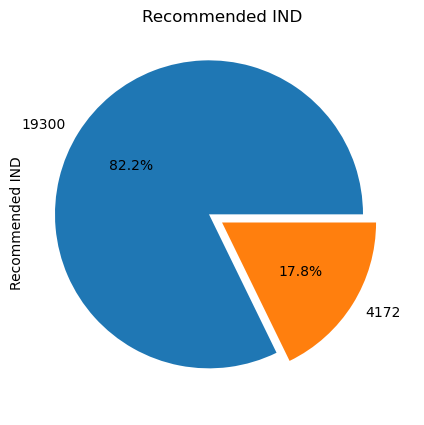

CPU times: user 113 ms, sys: 5.46 ms, total: 118 ms
Wall time: 40 ms


In [12]:
%%time
plt.figure(figsize=(5,5))
df['Recommended IND'].value_counts().plot(kind='pie', autopct="%1.1f%%",
        labels=pd.DataFrame(df['Recommended IND'].value_counts()).reset_index()['Recommended IND'],
        explode=(0.1,0))
plt.title('Recommended IND')
plt.show()

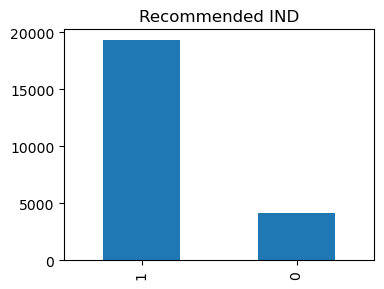

CPU times: user 136 ms, sys: 6.41 ms, total: 143 ms
Wall time: 48 ms


In [13]:
%%time
plt.figure(figsize=(4,3))
df['Recommended IND'].value_counts().plot(kind='bar')
plt.title('Recommended IND')
plt.show()

<timed exec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



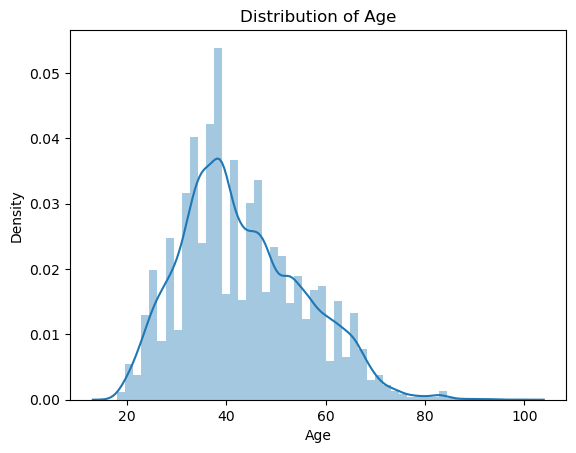

CPU times: user 474 ms, sys: 439 ms, total: 912 ms
Wall time: 142 ms


In [14]:
%%time
sns.distplot(df['Age'])
plt.title("Distribution of Age")
plt.show()


<timed exec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



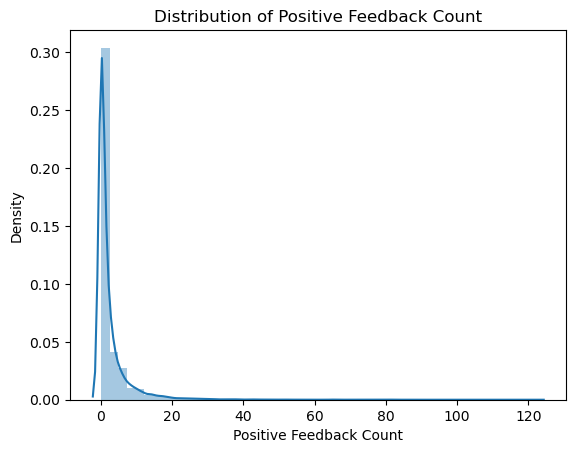

CPU times: user 523 ms, sys: 489 ms, total: 1.01 s
Wall time: 146 ms


In [15]:
%%time
sns.distplot(df['Positive Feedback Count'])
plt.title("Distribution of Positive Feedback Count")
plt.show()

In [16]:
%%time
df.describe(include='object').T

CPU times: user 111 ms, sys: 172 ms, total: 283 ms
Wall time: 42.3 ms


,count,unique,top,freq
Review Text,23472,22623,1,773
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [17]:
%%time
df.describe(exclude='object').T

CPU times: user 5.68 ms, sys: 1.14 ms, total: 6.81 ms
Wall time: 5.62 ms


,count,mean,std,min,25%,50%,75%,max
Age,23472.0,43.200707,12.280913,18.0,34.0,41.0,52.0,99.0
Rating,23472.0,4.195552,1.110188,1.0,4.0,5.0,5.0,5.0
Recommended IND,23472.0,0.822256,0.382305,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23472.0,2.537151,5.703597,0.0,0.0,1.0,3.0,122.0


CPU times: user 56.5 ms, sys: 4.84 ms, total: 61.4 ms
Wall time: 58.1 ms


<Axes: xlabel='count', ylabel='Class Name'>

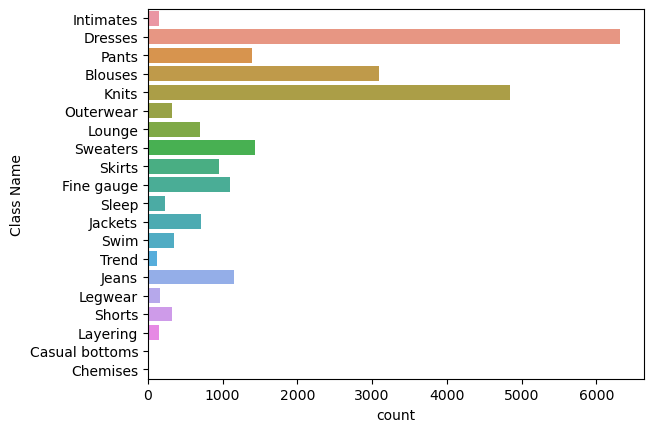

In [18]:
%%time
sns.countplot(y=df["Class Name"])

In [19]:
%%time
df["Class Name"].value_counts()


CPU times: user 2.26 ms, sys: 80 µs, total: 2.34 ms
Wall time: 848 µs


Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [20]:
%%time
df["Class Name"].unique()

CPU times: user 2.39 ms, sys: 958 µs, total: 3.35 ms
Wall time: 2.32 ms


array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

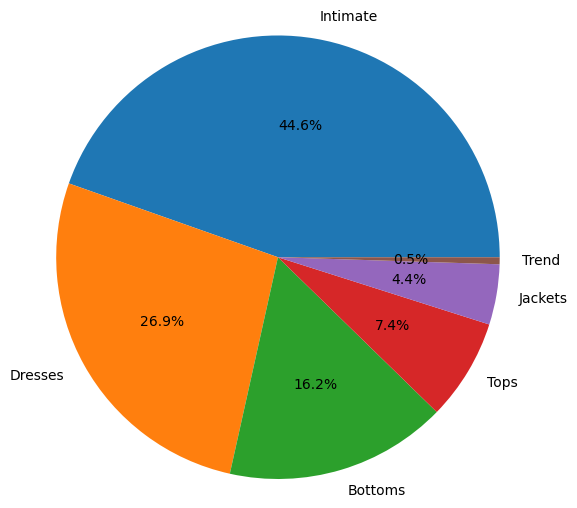

CPU times: user 121 ms, sys: 8.34 ms, total: 129 ms
Wall time: 78.7 ms


In [21]:
%%time
plt.pie(df["Department Name"].value_counts(),radius=1.5, autopct="%1.1f%%",labels=df["Department Name"].unique())
plt.show()

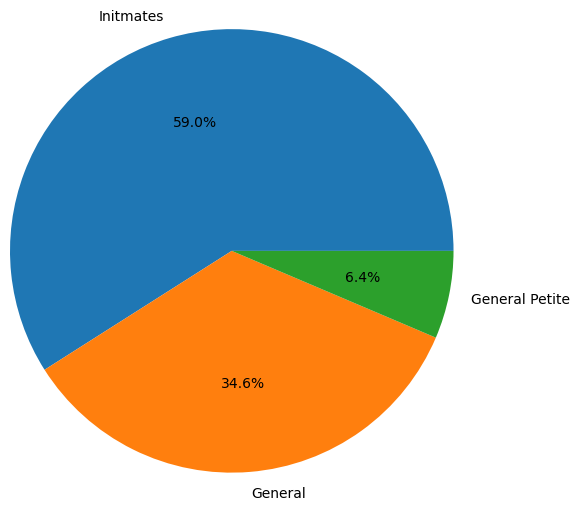

CPU times: user 103 ms, sys: 6.2 ms, total: 110 ms
Wall time: 65 ms


In [22]:
%%time
plt.pie(df["Division Name"].value_counts(),radius=1.5, autopct="%1.1f%%",labels=df["Division Name"].unique())
plt.show()

In [23]:
%%time
pd.crosstab(df["Division Name"],df["Recommended IND"])

CPU times: user 15.1 ms, sys: 2.84 ms, total: 17.9 ms
Wall time: 18 ms


Recommended IND,0,1
Division Name,,
General,2537,11313
General Petite,1413,6707
Initmates,222,1280


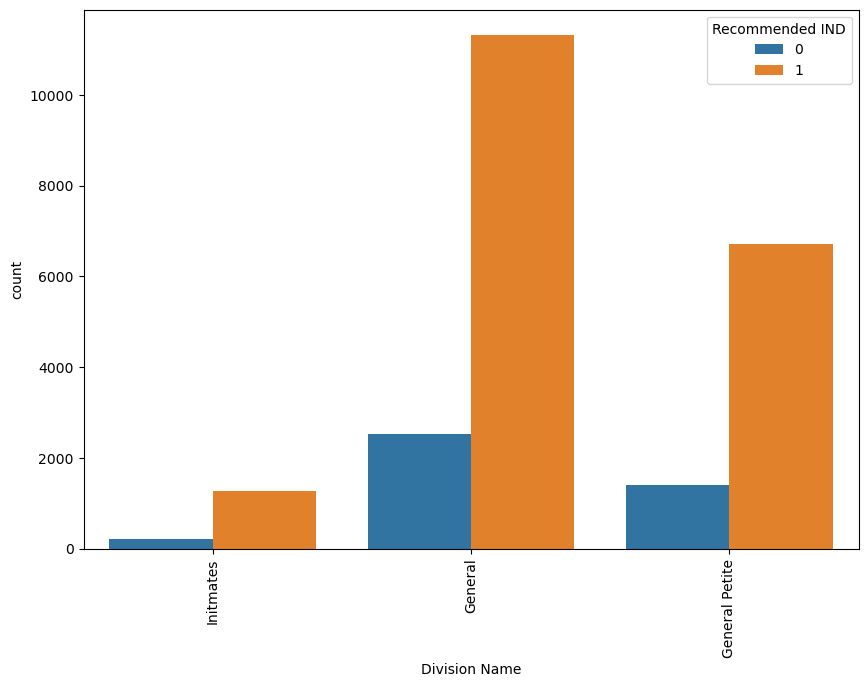

CPU times: user 197 ms, sys: 6.53 ms, total: 204 ms
Wall time: 94.3 ms


In [24]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Division Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()


In [25]:
%%time
pd.crosstab(df["Department Name"],df["Recommended IND"])


CPU times: user 16.9 ms, sys: 1.6 ms, total: 18.5 ms
Wall time: 5.75 ms


Recommended IND,0,1
Department Name,,
Bottoms,565,3234
Dresses,1212,5107
Intimate,260,1475
Jackets,169,863
Tops,1935,8533
Trend,31,88


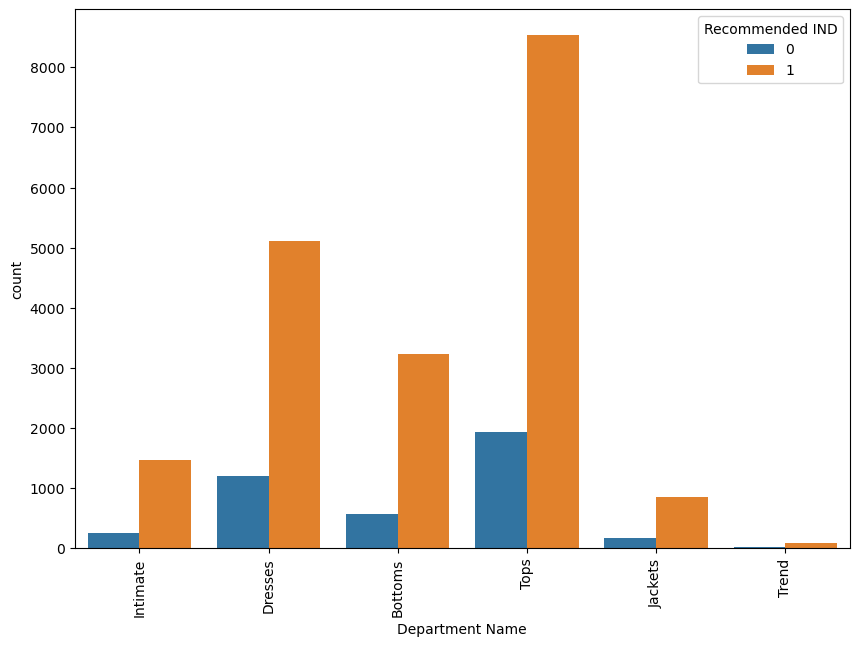

CPU times: user 175 ms, sys: 4.2 ms, total: 180 ms
Wall time: 79.2 ms


In [26]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Department Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [27]:
%%time
pd.crosstab(df["Class Name"],df["Recommended IND"])

CPU times: user 15.4 ms, sys: 2.99 ms, total: 18.3 ms
Wall time: 16.9 ms


Recommended IND,0,1
Class Name,,
Blouses,588,2509
Casual bottoms,0,2
Chemises,0,1
Dresses,1212,5107
Fine gauge,179,921
Intimates,22,132
Jackets,109,595
Jeans,136,1011
Knits,883,3960


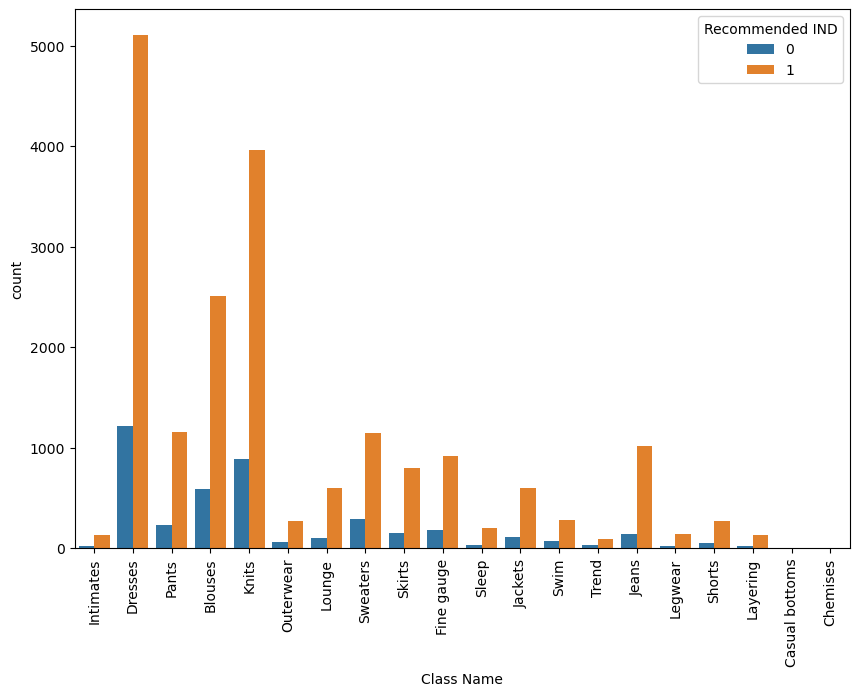

CPU times: user 404 ms, sys: 11 ms, total: 415 ms
Wall time: 183 ms


In [28]:
%%time
plt.figure(figsize=(10,7))
sns.countplot(x=df["Class Name"],hue=df["Recommended IND"])
plt.xticks(rotation=90, ha='center')
plt.show()


CPU times: user 31.3 ms, sys: 3.57 ms, total: 34.8 ms
Wall time: 32.4 ms


<Axes: xlabel='Recommended IND', ylabel='Positive Feedback Count'>

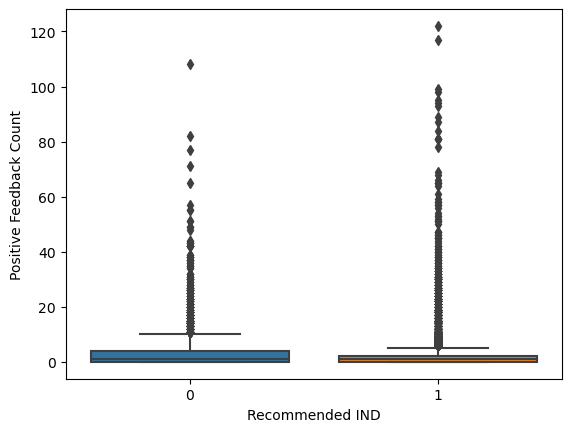

In [29]:
%%time
# Age,Rating,Positive Feedback Count v/s Recommended IND

#plt.figure(figsize= (4,3))
sns.boxplot(y = df["Positive Feedback Count"], x = df["Recommended IND"])

CPU times: user 36.9 ms, sys: 1.55 ms, total: 38.4 ms
Wall time: 12.2 ms


<Axes: xlabel='Recommended IND', ylabel='Age'>

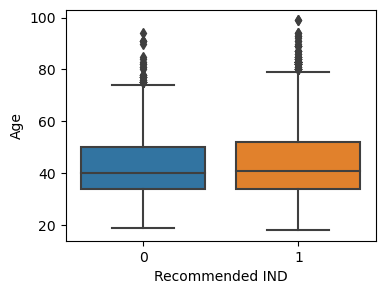

In [30]:
%%time
plt.figure(figsize= (4,3))
sns.boxplot(y = df["Age"], x = df["Recommended IND"])

CPU times: user 35.3 ms, sys: 1.68 ms, total: 37 ms
Wall time: 12.4 ms


<Axes: xlabel='Recommended IND', ylabel='Rating'>

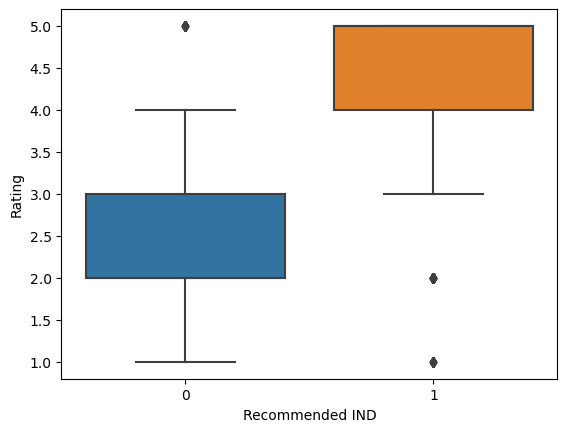

In [31]:
%%time
sns.boxplot(y = df["Rating"], x = df["Recommended IND"])

CPU times: user 4.27 s, sys: 1.93 s, total: 6.2 s
Wall time: 2.97 s


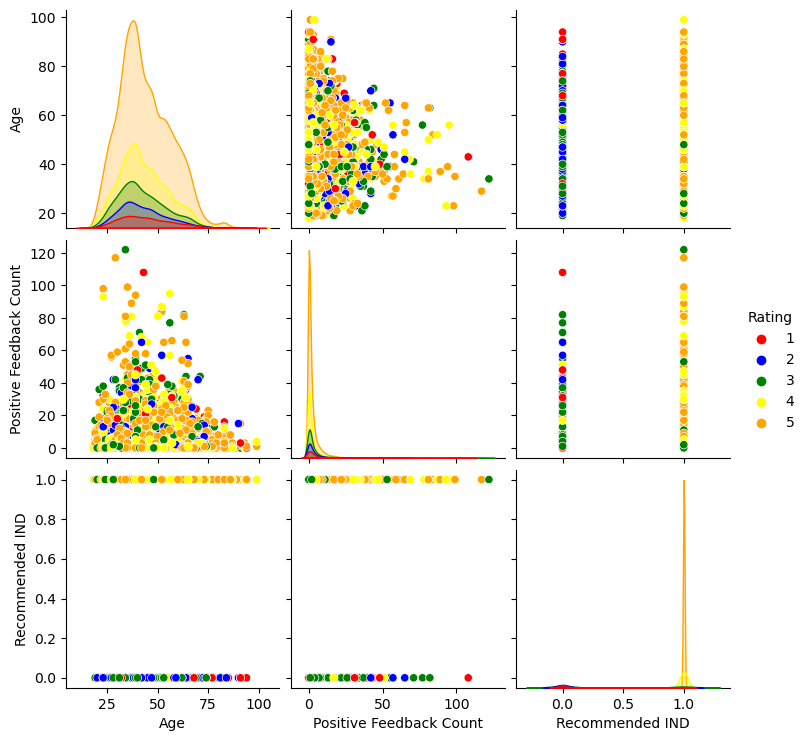

In [32]:
%%time
sns.pairplot(df[["Age","Rating","Positive Feedback Count","Recommended IND"]],
            diag_kind="kde",
            hue= "Rating",
            palette=["red", "blue", "green", "yellow", "orange"])



CPU times: user 62.8 ms, sys: 2.26 ms, total: 65.1 ms
Wall time: 30 ms


<timed eval>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

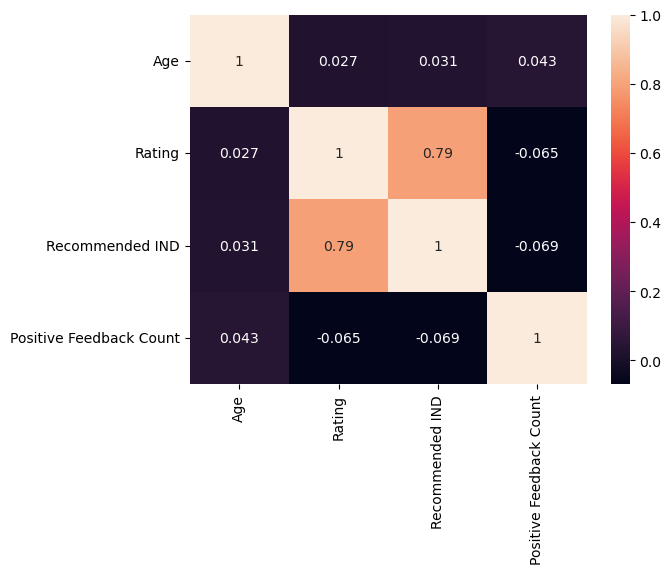

In [33]:
%%time
sns.heatmap(df.corr(),annot=True)